<a href="https://colab.research.google.com/github/yfhkucing/experiment_bms/blob/master/Model_temp_154.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
feature = pd.read_excel('data_model.xlsx',sheet_name='feature')
label = pd.read_excel('data_model.xlsx',sheet_name='label_154')

In [3]:
def norm(df):
  df=(df-df.min())/(df.max()-df.min())
  return df

In [4]:
feature.count()

Jendela                               192
AC                                    192
Arah Sudut Kecepatan Angin derajat    192
Nilai Kecepatan Angin                 192
Dry Bulb Temperature                  192
Fan/i1                                192
Fan/i2                                192
Fan/i3                                192
Fan/i4                                192
Fan/i5                                192
Fan/i6                                192
Fan/o1                                192
Fan/o2                                192
Fan/o3                                192
Fan/o4                                192
Fan/o5                                192
Fan/o6                                192
dtype: int64

In [5]:
label.count()

koor_x    29568
koor_y    29568
Vx        29568
Vy        29568
Temp      29568
dtype: int64

In [6]:
array_y = []
for i in range(154):
  frame= label[i::154]
  frame = frame.drop(['koor_x','koor_y'],axis=1)
  frame = frame.drop(['Vx','Vy'],axis=1)
  array_y.append(frame)

In [7]:
array_y[153]

,Temp
153,29.056709
307,30.032925
461,29.968340
615,29.310209
769,29.309998
...,...
28951,26.147747
29105,25.840082
29259,23.635651
29413,24.730881


In [8]:
! mkdir models
y_testing = []

import joblib
from sklearn.linear_model import LinearRegression

#model
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, LogisticRegression, Ridge, ElasticNet,LassoLars
from sklearn.ensemble import RandomForestRegressor

#preprocessing and metric
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

for i in range(154):
  x = np.array(feature)
  y = np.array(array_y[i])
  x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.15, random_state= 10)
  y_testing.append(y_test)
  #fitting
  regressor = LassoLars(alpha=0.6, normalize=False)
  regressor.fit(x_train,y_train)
  joblib.dump(regressor,f'/content/models/model {i}',)

mkdir: cannot create directory ‘models’: File exists


In [9]:
skor_r2=[]
mae_=[]
rmse = []
y_predict = []
for i in range(154):
  model = joblib.load(f'/content/models/model {i}')
  y_pred = model.predict(x_test)
  Skor_r2 = r2(y_test,y_pred)
  RMSE = mse(y_test,y_pred,squared=False)
  MAE = mae(y_test,y_pred)
  y_predict.append(y_pred)
  skor_r2.append(Skor_r2)
  mae_.append(MAE)
  rmse.append(RMSE)

In [10]:
skor_r2 = np.array(skor_r2)
rmse = np.array(rmse)
mae_=np.array(mae_)
y_predict = np.array(y_predict)
y_testing = np.array(y_testing)

In [11]:
skor_r2.shape, rmse.shape, y_predict.shape, y_testing.shape

((154,), (154,), (154, 29), (154, 29, 1))

In [12]:
r2_matrix = skor_r2.reshape(11,14)
rmse_matrix = rmse.reshape(11,14)
mae_matrix = mae_.reshape(11,14)

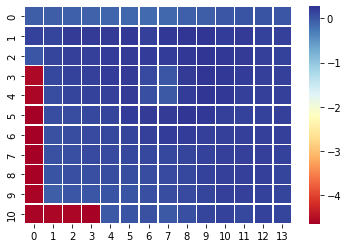

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(r2_matrix, linewidth=0.5, cmap="RdYlBu")
plt.show()

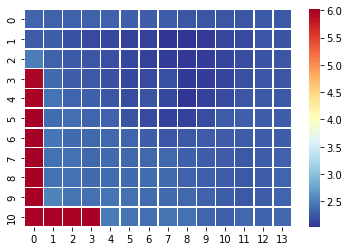

In [14]:
bx = sns.heatmap(mae_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

In [15]:
scenarios = 2  #0-28
indexing = 0    #0-3 (Vx,Vy,Vz,temp)

In [16]:
a = y_testing[(...,scenarios,indexing)]
b = y_predict[...,scenarios]
a = np.array(a)
b = np.array(b)
a = a.reshape(11,14)
b = b.reshape(11,14)
print('reshaped')

reshaped


In [17]:
!zip -r /content/models_temp_154_a06.zip /content/models

  adding: content/models/ (stored 0%)
  adding: content/models/model 125 (deflated 54%)
  adding: content/models/model 111 (deflated 54%)
  adding: content/models/model 58 (deflated 54%)
  adding: content/models/model 68 (deflated 54%)
  adding: content/models/model 105 (deflated 54%)
  adding: content/models/model 108 (deflated 54%)
  adding: content/models/model 17 (deflated 54%)
  adding: content/models/model 106 (deflated 54%)
  adding: content/models/model 87 (deflated 54%)
  adding: content/models/model 63 (deflated 54%)
  adding: content/models/model 26 (deflated 54%)
  adding: content/models/model 150 (deflated 54%)
  adding: content/models/model 23 (deflated 54%)
  adding: content/models/model 52 (deflated 54%)
  adding: content/models/model 124 (deflated 53%)
  adding: content/models/model 41 (deflated 53%)
  adding: content/models/model 54 (deflated 53%)
  adding: content/models/model 7 (deflated 53%)
  adding: content/models/model 147 (deflated 54%)
  adding: content/models